In [12]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r"C:\Users\Sadiya\Downloads\Week_8_Q&A_dataset - Sheet1.csv")

In [2]:
data.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [5]:
data.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [14]:
data.describe(include='all')

,Gender,Test preparation,Total Marks
count,28,28,28.000000
unique,2,2,NaN
top,female,none,NaN
freq,16,21,NaN
mean,NaN,NaN,32.321429
std,NaN,NaN,12.454520
min,NaN,NaN,12.000000
25%,NaN,NaN,22.500000
50%,NaN,NaN,33.000000
75%,NaN,NaN,43.250000


In [15]:
data.groupby(["Gender","Test preparation"]).mean()

Total Marks
Gender Test preparation             
female completed           45.250000
       none                29.916667
male   completed           43.666667
       none                26.000000

C:\Users\Sadiya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Marks', ylabel='Density'>

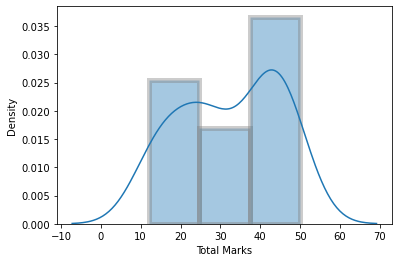

In [16]:
sns.distplot(data['Total Marks'],hist_kws=dict(edgecolor="grey",linewidth=5))

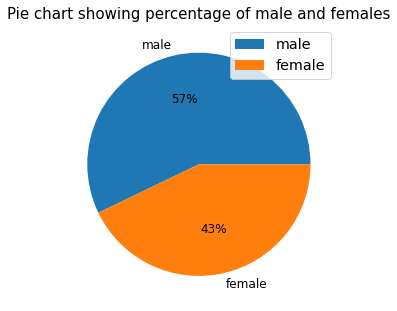

In [17]:
plt.rcParams['font.size'] = 12
plt.figure(figsize=(5,8))
plt.title("Pie chart showing percentage of male and females",fontsize=15)
plt.pie(data['Gender'].value_counts(), labels = data['Gender'].unique(), autopct='%.0f%%')
plt.legend(data['Gender'].unique(),loc="upper right",fontsize='large')
plt.show()

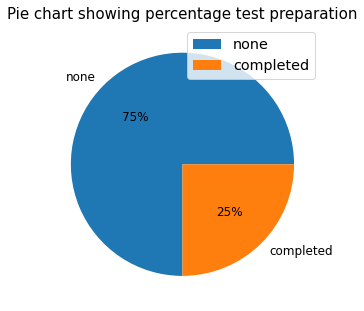

In [18]:
plt.rcParams['font.size'] = 12
plt.figure(figsize=(5,8))
plt.title("Pie chart showing percentage test preparation",fontsize=15)
plt.pie(data['Test preparation'].value_counts(), labels = data['Test preparation'].unique(), autopct='%.0f%%')
plt.legend(data['Test preparation'].unique(),loc="upper right",fontsize='large')
plt.show()


1.There are no null-values
2.from histplot and distplot, most of the students scores between 44 to 50. Less no.of students score between 25 to 39.
3.We find that the count of females is 57% and male is 43%.
4.78% students didn't attempt or complete the preparation while 25% students completed the Test Prep.


## Check whether female and male students scored the same marks.


#### H0:Male and Female students score the same mark
#### H1:male and female students score different marks

In [4]:
df=pd.DataFrame(data)
data.groupby("Gender")["Total Marks"].count()

Gender
female    16
male      12
Name: Total Marks, dtype: int64

In [8]:
female=df[df['Gender']=='female']['Total Marks']
male=df[df['Gender']=='male']['Total Marks']




In [9]:
from scipy.stats import ttest_ind
data3=ttest_ind(female,male)
data3

Ttest_indResult(statistic=0.6940885268848668, pvalue=0.4937822317960763)

In [24]:
alpha=0.025
t_test_value=data3[0]
print("the test statistic value is",t_test_value)
pvalue=data3[1]
print ("the p value is",pvalue)

the test statistic value is 0.6940885268848668
the p value is 0.4937822317960763


In [27]:
critical_val=stats.t.ppf(1-0.025,26)
print("critical value is",critical_val)

critical value is 2.055529438642871


In [28]:
if t_test_value>=critical_val:
    print("Reject H0")
else:
    print("accept H0")
if pvalue<=0.05:
    print("Reject H0")
else:
    print("accept H0")

accept H0
accept H0


#### Result:Male and female students score same mark

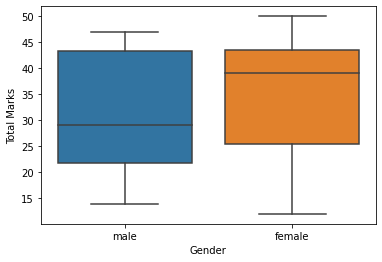

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Gender',y='Total Marks',data=df)
plt.show()

the graph clearly shows distribution of mark is almost same for both genders

## Whether test preparation helps the students?

In [32]:
data.head()


,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


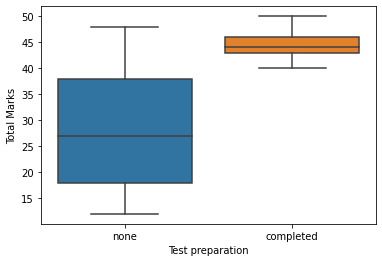

In [6]:
sns.boxplot(x='Test preparation',y='Total Marks',data=data)
plt.show()

Hypothesis

H0: Test preparation has no effect on students performance

H1: Test preparation effected in increasing student's Marks

In [7]:
grouped=data.groupby("Test preparation")
none=grouped.get_group('none')
completed=grouped.get_group('completed')

In [11]:
ttest,pval = stats.ttest_ind(completed['Total Marks'],none['Total Marks'])
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis i.e. Mean Score of students who completed the test preparation > Mean Score of students who did not complete the test preparation")
else:
  print("We accept null hypothesis i.e. Mean Score of students who completed the test preparation <= Mean Score of students who did not complete the test preparation")

p-value 0.0012671292457320106
We reject null hypothesis i.e. Mean Score of students who completed the test preparation > Mean Score of students who did not complete the test preparation


### the test preparation helps the students to get higher marks